In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import time
import geopandas 
from shapely.geometry import Point

In [2]:
url = "http://api.open-notify.org/iss-now.json"
ISS_locations=[]
for i in range(100):
    x = requests.get(url)
    data = x.json()
    ISS_locations.append(data)
    time.sleep(10)
    print (ISS_locations)

[{'timestamp': 1657923129, 'message': 'success', 'iss_position': {'longitude': '-166.2083', 'latitude': '-51.5595'}}]
[{'timestamp': 1657923129, 'message': 'success', 'iss_position': {'longitude': '-166.2083', 'latitude': '-51.5595'}}, {'timestamp': 1657923139, 'message': 'success', 'iss_position': {'longitude': '-165.1623', 'latitude': '-51.5886'}}]
[{'timestamp': 1657923129, 'message': 'success', 'iss_position': {'longitude': '-166.2083', 'latitude': '-51.5595'}}, {'timestamp': 1657923139, 'message': 'success', 'iss_position': {'longitude': '-165.1623', 'latitude': '-51.5886'}}, {'timestamp': 1657923149, 'message': 'success', 'iss_position': {'longitude': '-164.1651', 'latitude': '-51.6069'}}]
[{'timestamp': 1657923129, 'message': 'success', 'iss_position': {'longitude': '-166.2083', 'latitude': '-51.5595'}}, {'timestamp': 1657923139, 'message': 'success', 'iss_position': {'longitude': '-165.1623', 'latitude': '-51.5886'}}, {'timestamp': 1657923149, 'message': 'success', 'iss_positio

In [3]:
# Initialize empty dictionary (will become the ISS dataframe)
ISS_dict={'latitude': None, 'longitude': None, 'timestamp': None}
# Initialize empty lists to populate with values from the API
lat_list = []
long_list = []
time_list = []
# Loop through the API list and extract latitude, longitude, and timestamp
for i in range(0,len(ISS_locations)):
    lat_list.append(ISS_locations[i]['iss_position']['latitude'])
    long_list.append(ISS_locations[i]['iss_position']['longitude'])
    time_list.append(ISS_locations[i]['timestamp'])
# Populate ISS dictionary
ISS_dict['latitude'] = lat_list
ISS_dict['longitude'] = long_list
ISS_dict['timestamp'] = time_list

# Turn the ISS position dictionary into a data frame 
ISS_df = pd.DataFrame.from_dict(ISS_dict)

# Change values to integers from strings
ISS_df['latitude'] = ISS_df['latitude'].astype(float)
ISS_df['longitude'] = ISS_df['longitude'].astype(float)
ISS_df['timestamp'] = ISS_df['timestamp'].astype(float)

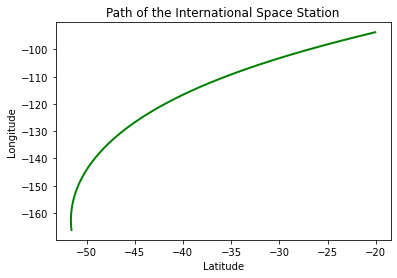

In [5]:
fig, ax = plt.subplots()

ax.set_title("Path of the International Space Station")
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.plot(ISS_df["latitude"], ISS_df["longitude"], color="green", linewidth=2)

/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


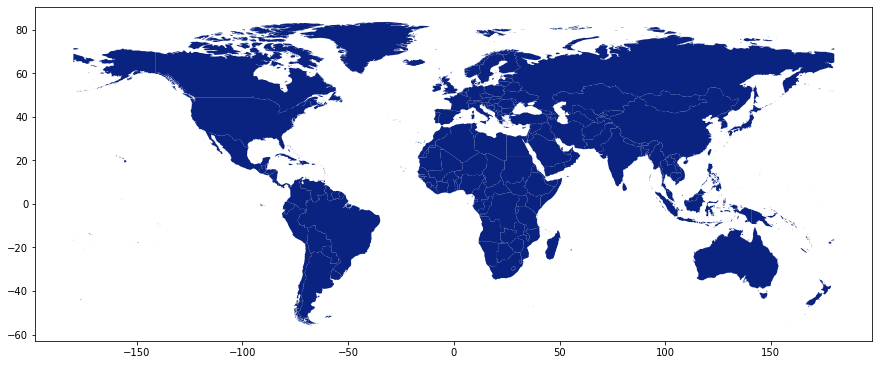

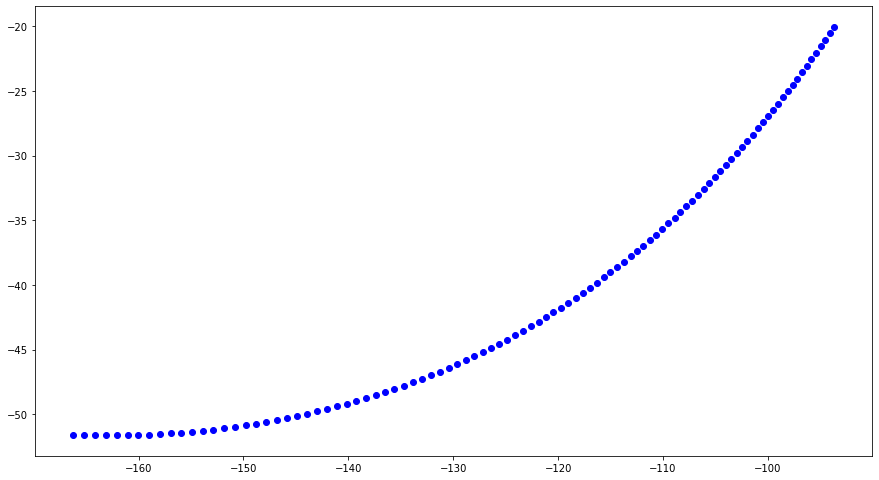

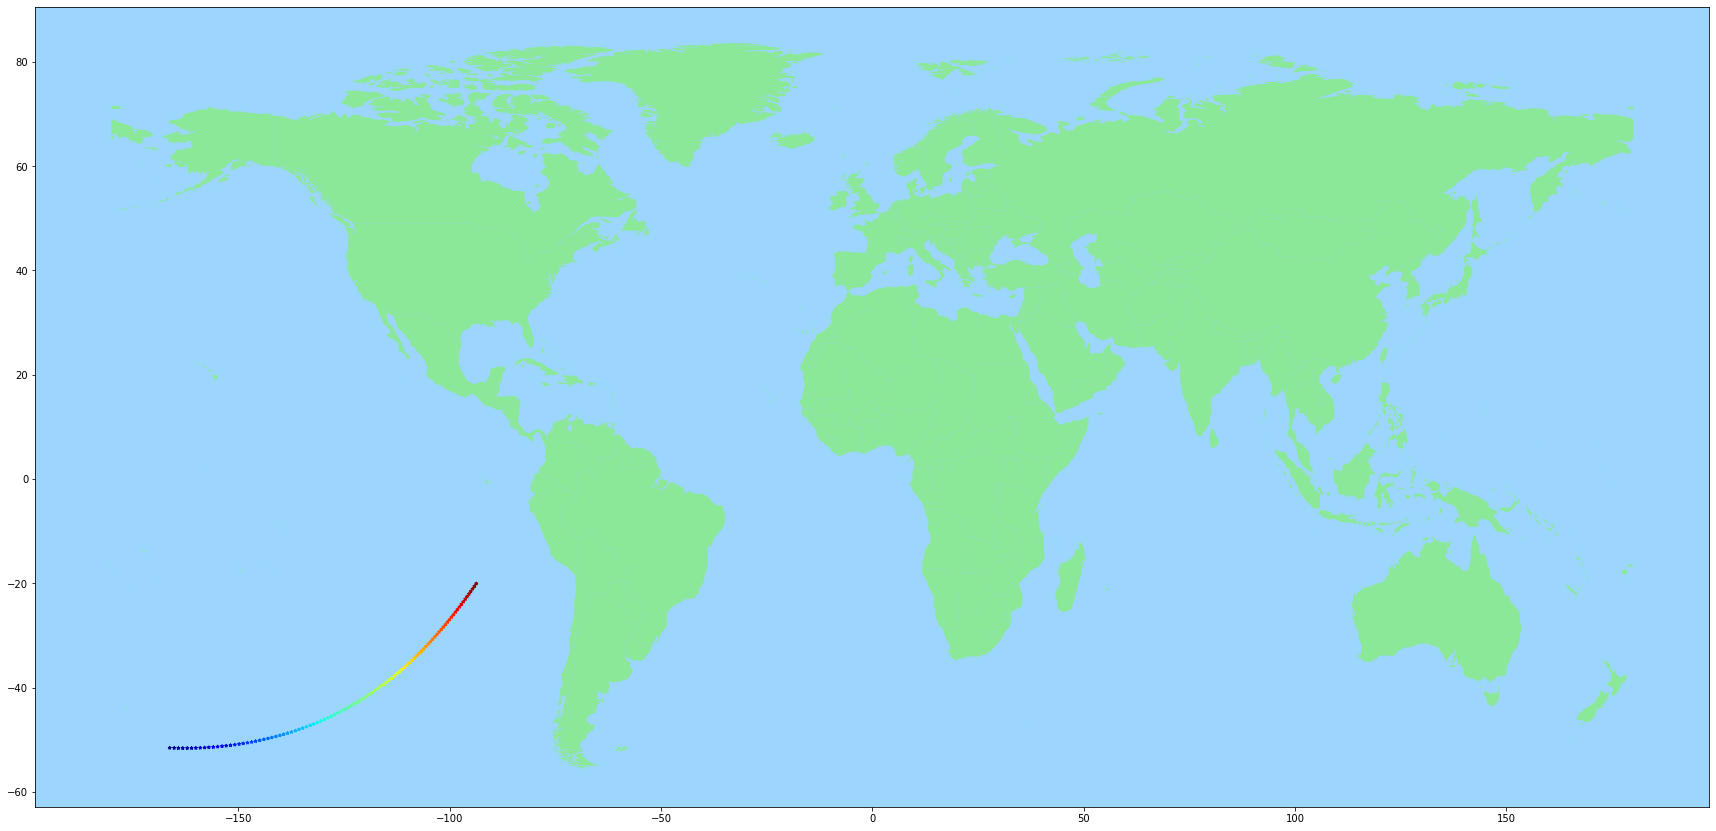

In [9]:
# Make a coordinates column that has a value of a list of longitude and latitude
ISS_df['coordinates'] = ISS_df[['longitude', 'latitude']].values.tolist()
# Make the coordinate column a Point object
ISS_df['coordinates'] = ISS_df['coordinates'].apply(Point)
# Convert pandas datframe into a geopandas dataframe
geo_ISS = geopandas.GeoDataFrame(ISS_df, geometry='coordinates', crs={'init': 'epsg:4326'})

# Read in the geojson file and inspect it
earth = geopandas.read_file("custom.geo.json")
earth.head()
# View the plot of the geojson Polygon objects
earth.plot(figsize=(15,10),  color='#0B2380',)

#Plot the ISS Path
geo_ISS.plot(figsize=(15,10), color='blue')

# Plotting to see the ISS overlay the world:
# make earth the base figure
fig, ax = plt.subplots(1, figsize=(30,20))
base = earth.plot(ax=ax, color='#8BE898',)
base.set_facecolor('#9CD6FF')
# plotting the ISS position over the earth with navy
geo_ISS.plot(ax=base, marker="*", markersize=10, cmap = 'jet');
fig.savefig('ISS path')